# Hands on session: t-SNE
In this example, we explore the use of t-SNE to visualize high-dimensional data. 

This exercise refers to Chapter 5 "t-SNE" of the "Dimensionality reduction in neuroscience" course (tutor: Fabrizio Musacchio, Oct 17, 2024)

## Acknowledgements:
The dataset used here is extracted from the the datasets available in the [openTSEN package](https://opentsne.readthedocs.io/en/stable/examples/01_simple_usage/01_simple_usage.html). Specifically, it is the Macosko 2015 mouse retina data set. 

## Environment setup
For reproducibility:

```bash
conda create -n dimredcution python=3.11 mamba -y
conda activate dimredcution
mamba install ipykernel matplotlib numpy scipy scikit-learn -y
```

Let's import the necessary libraries:

In [1]:
# %% IMPORTS
import os
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

# set global properties for all plots:
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.spines.top"]    = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"]   = False
plt.rcParams["axes.spines.right"]  = False

Define the path to the data file:

In [2]:
DATA_PATH = '../data/'
DATA_FILENAME = 'macosko_2015.pkl.gz'
DATA_FILE = os.path.join(DATA_PATH, DATA_FILENAME)

RESULTSPATH = '../results/'
# check whether the results path exists, if not, create it:
if not os.path.exists(RESULTSPATH):
    os.makedirs(RESULTSPATH)

Load the data and inspect its structure:

In [3]:
# %% LOAD DATA
with gzip.open(DATA_FILE, "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]

# Convert y to a sequence of numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["CellType2"])
y = data["CellType1"].astype(str)
#np.unique(data["CellType2"])
#np.unique(data["CellType1"])

print(f"The RNA data set (x) contains {x.shape[0]} samples with {x.shape[1]} features")
print(f"y has shape {y.shape} with unique values: {np.unique(y)}")


The RNA data set (x) contains 44808 samples with 50 features
y has shape (44808,) with unique values: ['Amacrine cells' 'Astrocytes' 'Bipolar cells' 'Cones' 'Fibroblasts'
 'Horizontal cells' 'Microglia' 'Muller glia' 'Pericytes'
 'Retinal ganglion cells' 'Rods' 'Vascular endothelium']


For our later plots, we define an according color dictionary:

In [4]:
# decipher the cell types and create an appropriate color-label array:
MACOSKO_COLORS = {
    "Amacrine cells": "#A5C93D",
    "Astrocytes": "#8B006B",
    "Bipolar cells": "#2000D7",
    "Cones": "#538CBA",
    "Fibroblasts": "#8B006B",
    "Horizontal cells": "#B33B19",
    "Microglia": "#8B006B",
    "Muller glia": "#8B006B",
    "Pericytes": "#8B006B",
    "Retinal ganglion cells": "#C38A1F",
    "Rods": "#538CBA",
    "Vascular endothelium": "#8B006B",
}

# map the cell types in y to their corresponding colors:
colors_array = [MACOSKO_COLORS[cell_type] for cell_type in y]

## 📝 Perform a t-SNE analysis on the data 

using the following parameters:
- n_components=2
- perplexity = 30
- n_iter = 1000
- random_state = 42
- metric = 'euclidean'
- verbose = 1
- init = 'pca'
- n_jobs = -1

In [5]:
# Your code goes here:

# define the t-sne model:
# tsne = ...

# fit the model:



# SOL:
# define the t-sne model:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, metric='euclidean',
            verbose=1, init='pca', n_jobs=-1)

# fit the model:
model_tsne = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 44808 samples in 0.005s...
[t-SNE] Computed neighbors for 44808 samples in 1.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44808
[t-SNE] Computed conditional probabilities for sample 2000 / 44808
[t-SNE] Computed conditional probabilities for sample 3000 / 44808
[t-SNE] Computed conditional probabilities for sample 4000 / 44808
[t-SNE] Computed conditional probabilities for sample 5000 / 44808
[t-SNE] Computed conditional probabilities for sample 6000 / 44808
[t-SNE] Computed conditional probabilities for sample 7000 / 44808
[t-SNE] Computed conditional probabilities for sample 8000 / 44808
[t-SNE] Computed conditional probabilities for sample 9000 / 44808
[t-SNE] Computed conditional probabilities for sample 10000 / 44808
[t-SNE] Computed conditional probabilities for sample 11000 / 44808
[t-SNE] Computed conditional probabilities for sample 12000 / 44808
[t-SNE] Computed conditional probabilities for sam

## 📝 Plot the results
Plot the t-SNE results using the color dictionary defined above. 

To assign the cell types to the clusters, you can use the following code snippet:

```python
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
```

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7102/685398279.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model_tsne[:, 0], model_tsne[:, 1], s=1, cmap='tab20', c=colors_array, alpha=0.6)


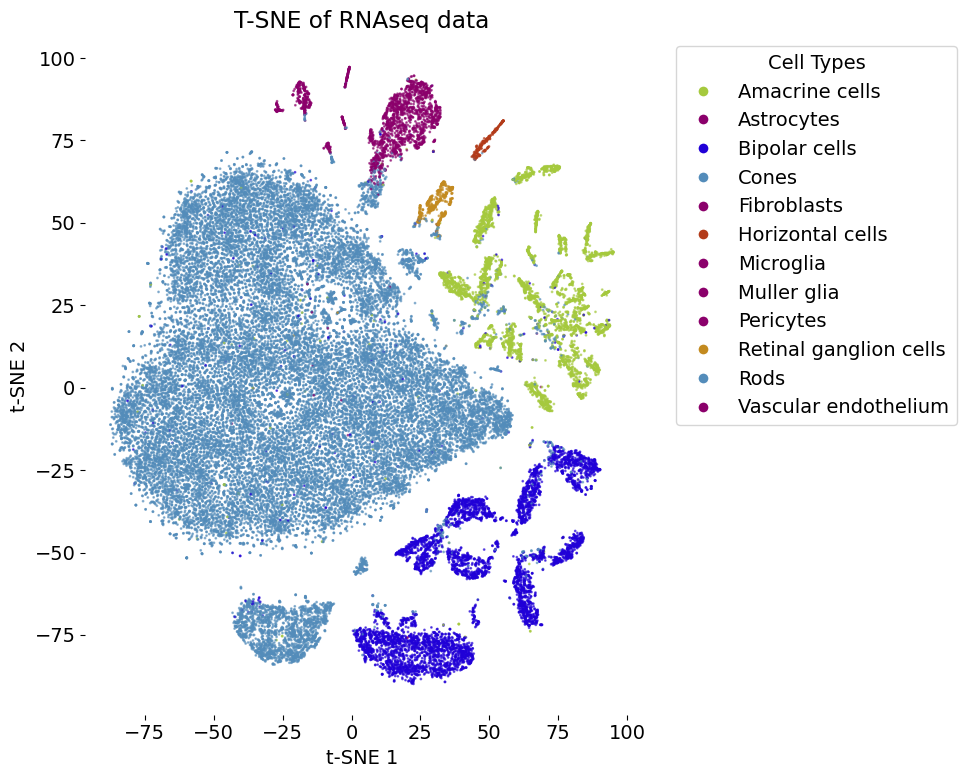

In [6]:
# Your code goes here:

# SOL:
# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(model_tsne[:, 0], model_tsne[:, 1], s=1, cmap='tab20', c=colors_array, alpha=0.6)
plt.title('T-SNE of RNAseq data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit.png'), dpi=300)
plt.show()

## 📝 Compare with PCA
For comparison, perform a PCA analysis on the data and plot the results.

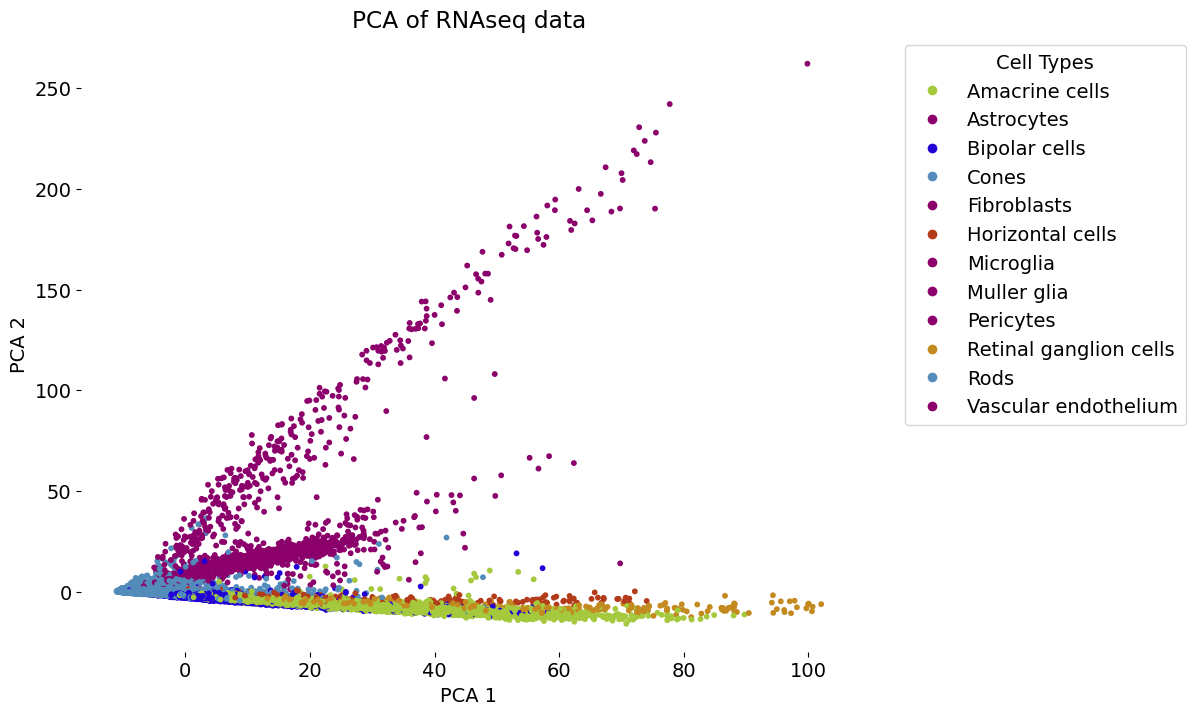

In [7]:
# Your code goes here:

# SOL:
# define the PCA model:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)  # x is your data (same as used for t-SNE)

# plot the PCA results:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], s=10, c=colors_array)

# Add a title and axis labels
plt.title('PCA of RNAseq data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# create a legend with unique cell types and their associated colors:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')

# save and show the plot:
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit_pca.png'), dpi=300, bbox_inches='tight')
plt.show()

## Preserving global structure
Preserving global structure refers to the ability of the dimensionality reduction algorithm to preserve the relationships between the data points in the high-dimensional space. This is important because it allows us to see the similarities and differences between the data points in the low-dimensional 'tsne' space.

This can be achieved by:

- initializing the t-sne model with the PCA results (`init='pca'`, not with `init='random'`)
- changing the metric used to calculate the distances between the data points:
    - `euclidean` (default)
    - `manhattan` (L1 distance; Computes the sum of the absolute differences between coordinates.)
    - `chebyshev` (computes the maximum absolute difference between coordinates.)
    - `minkowski` (a generalized form of both Euclidean and Manhattan distances (depending on the order p); You can set p=1 for Manhattan or p=2 for Euclidean).
    - `cosine` (computes the cosine of the angle between two vectors (typically used for high-dimensional data such as text).
    - `correlation` (computes the correlation distance between vectors, often used for time-series data.) 
    - `jaccard` (computes the Jaccard distance between two binary sets. This is useful for comparing binary vectors (e.g., sets of features).)
    - 'hamming` (computes the proportion of differing coordinates between two vectors (often used with binary data))
- changing the `perplexity` parameter

## 📝 Define a t-sne model with euclidean metric and random initialization
1. Fit the model with the data.
2. Plot the results.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 44808 samples in 0.003s...
[t-SNE] Computed neighbors for 44808 samples in 1.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44808
[t-SNE] Computed conditional probabilities for sample 2000 / 44808
[t-SNE] Computed conditional probabilities for sample 3000 / 44808
[t-SNE] Computed conditional probabilities for sample 4000 / 44808
[t-SNE] Computed conditional probabilities for sample 5000 / 44808
[t-SNE] Computed conditional probabilities for sample 6000 / 44808
[t-SNE] Computed conditional probabilities for sample 7000 / 44808
[t-SNE] Computed conditional probabilities for sample 8000 / 44808
[t-SNE] Computed conditional probabilities for sample 9000 / 44808
[t-SNE] Computed conditional probabilities for sample 10000 / 44808
[t-SNE] Computed conditional probabilities for sample 11000 / 44808
[t-SNE] Computed conditional probabilities for sample 12000 / 44808
[t-SNE] Computed conditional probabilities for sam

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7102/2922486375.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model_tsne_random[:, 0], model_tsne_random[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


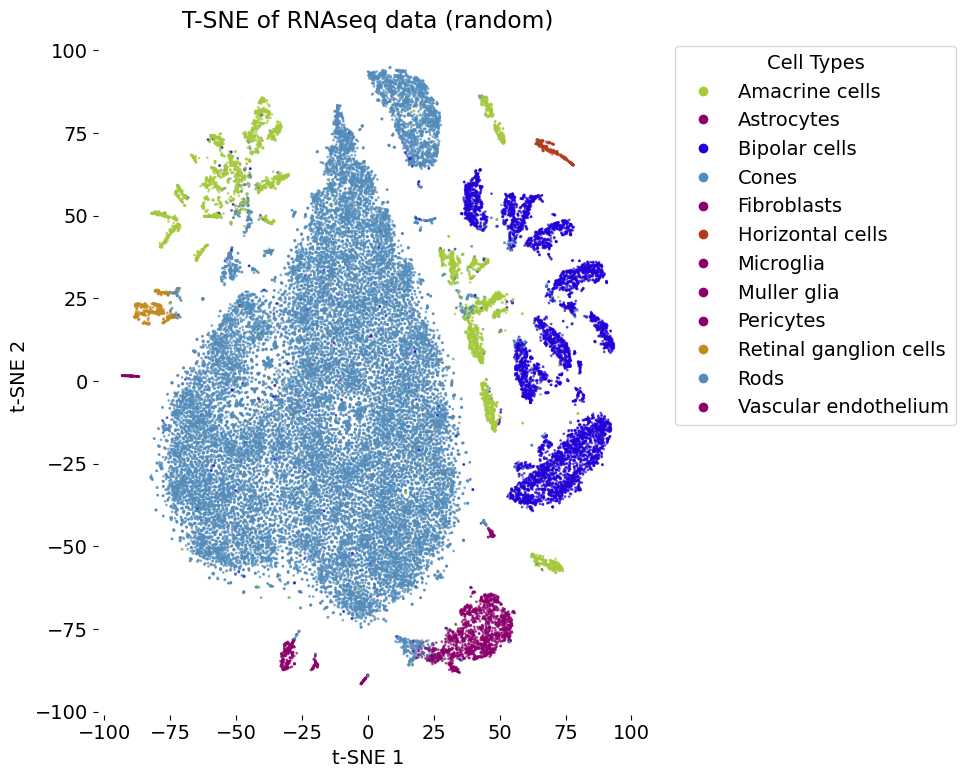

In [8]:
# Your code goes here:

tsne_random = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, metric='euclidean',
                   verbose=1, init='random', n_jobs=-1)

# fit the model:
model_tsne_random = tsne_random.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(model_tsne_random[:, 0], model_tsne_random[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('T-SNE of RNAseq data (random)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
              for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit_random_init.png'), dpi=300)
plt.show()

## 📝 Define the t-sne model with cosine metric and pca initialization
1. Fit the model with the data.
2. Plot the results.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 44808 samples in 0.002s...
[t-SNE] Computed neighbors for 44808 samples in 36.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44808
[t-SNE] Computed conditional probabilities for sample 2000 / 44808
[t-SNE] Computed conditional probabilities for sample 3000 / 44808
[t-SNE] Computed conditional probabilities for sample 4000 / 44808
[t-SNE] Computed conditional probabilities for sample 5000 / 44808
[t-SNE] Computed conditional probabilities for sample 6000 / 44808
[t-SNE] Computed conditional probabilities for sample 7000 / 44808
[t-SNE] Computed conditional probabilities for sample 8000 / 44808
[t-SNE] Computed conditional probabilities for sample 9000 / 44808
[t-SNE] Computed conditional probabilities for sample 10000 / 44808
[t-SNE] Computed conditional probabilities for sample 11000 / 44808
[t-SNE] Computed conditional probabilities for sample 12000 / 44808
[t-SNE] Computed conditional probabilities for sa

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7102/123091047.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model_tsne_cos[:, 0], model_tsne_cos[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


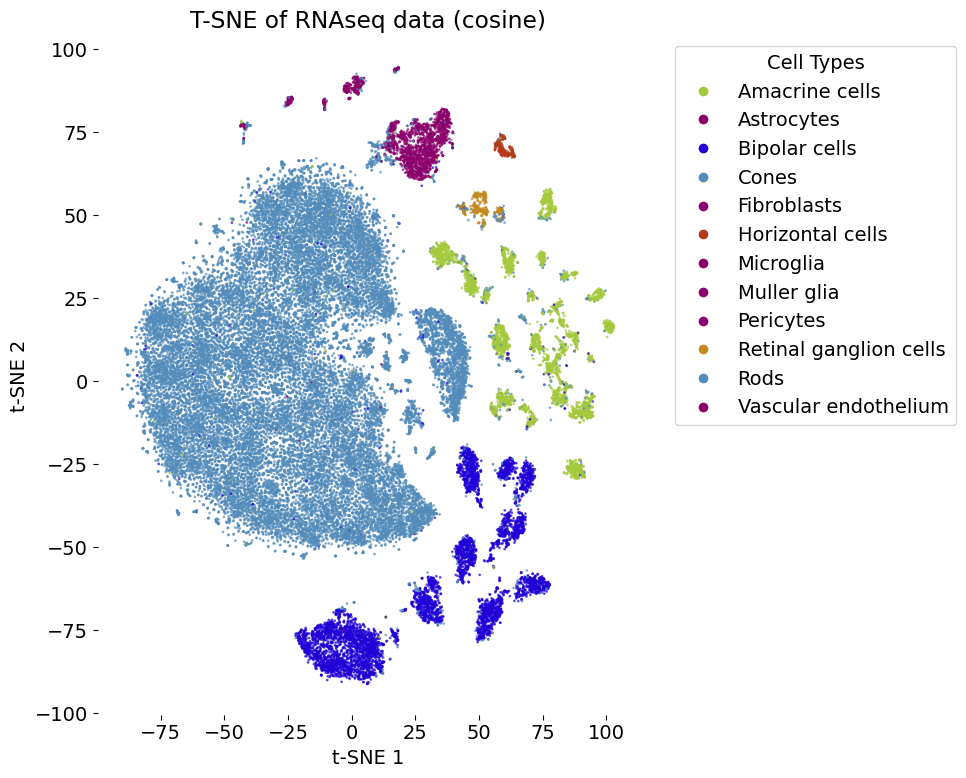

In [9]:
# Your code goes here:


# SOL:
tsne_cos = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, metric='cosine',
            verbose=1, init='pca', n_jobs=-1)

# fit the model:
model_tsne_cos = tsne_cos.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(model_tsne_cos[:, 0], model_tsne_cos[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('T-SNE of RNAseq data (cosine)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit_cosine_and_random_init.png'), dpi=300)
plt.show()

## 📝 Define a t-sne model with manhattan metric and pca initialization
1. Fit the model with the data.
2. Plot the results.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 44808 samples in 0.002s...
[t-SNE] Computed neighbors for 44808 samples in 7.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44808
[t-SNE] Computed conditional probabilities for sample 2000 / 44808
[t-SNE] Computed conditional probabilities for sample 3000 / 44808
[t-SNE] Computed conditional probabilities for sample 4000 / 44808
[t-SNE] Computed conditional probabilities for sample 5000 / 44808
[t-SNE] Computed conditional probabilities for sample 6000 / 44808
[t-SNE] Computed conditional probabilities for sample 7000 / 44808
[t-SNE] Computed conditional probabilities for sample 8000 / 44808
[t-SNE] Computed conditional probabilities for sample 9000 / 44808
[t-SNE] Computed conditional probabilities for sample 10000 / 44808
[t-SNE] Computed conditional probabilities for sample 11000 / 44808
[t-SNE] Computed conditional probabilities for sample 12000 / 44808
[t-SNE] Computed conditional probabilities for sam

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7102/2132457997.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model_tsne_manhattan[:, 0], model_tsne_manhattan[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


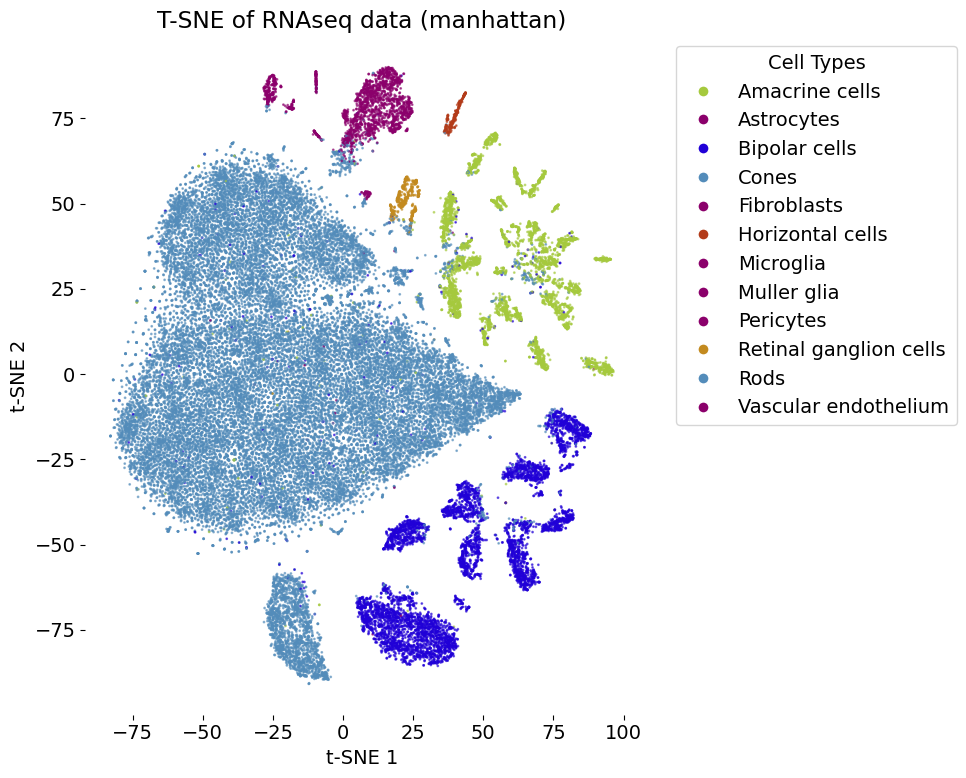

In [10]:
# Your code goes here:

# SOL:
tsne_manhattan = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, metric='manhattan',
            verbose=1, init='pca', n_jobs=-1)

# fit the model:
model_tsne_manhattan = tsne_manhattan.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(model_tsne_manhattan[:, 0], model_tsne_manhattan[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('T-SNE of RNAseq data (manhattan)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit_manhattan_and_random_init.png'), dpi=300)
plt.show()

## 📝 Define a t-sne model with euclidean metric, pca initialization and a perplexity of 500
1. Fit the model with the data.
2. Plot the results.

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 44808 samples in 0.003s...
[t-SNE] Computed neighbors for 44808 samples in 5.609s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44808
[t-SNE] Computed conditional probabilities for sample 2000 / 44808
[t-SNE] Computed conditional probabilities for sample 3000 / 44808
[t-SNE] Computed conditional probabilities for sample 4000 / 44808
[t-SNE] Computed conditional probabilities for sample 5000 / 44808
[t-SNE] Computed conditional probabilities for sample 6000 / 44808
[t-SNE] Computed conditional probabilities for sample 7000 / 44808
[t-SNE] Computed conditional probabilities for sample 8000 / 44808
[t-SNE] Computed conditional probabilities for sample 9000 / 44808
[t-SNE] Computed conditional probabilities for sample 10000 / 44808
[t-SNE] Computed conditional probabilities for sample 11000 / 44808
[t-SNE] Computed conditional probabilities for sample 12000 / 44808
[t-SNE] Computed conditional probabilities for s

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7102/1027446199.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model_tsne_perplexity[:, 0], model_tsne_perplexity[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


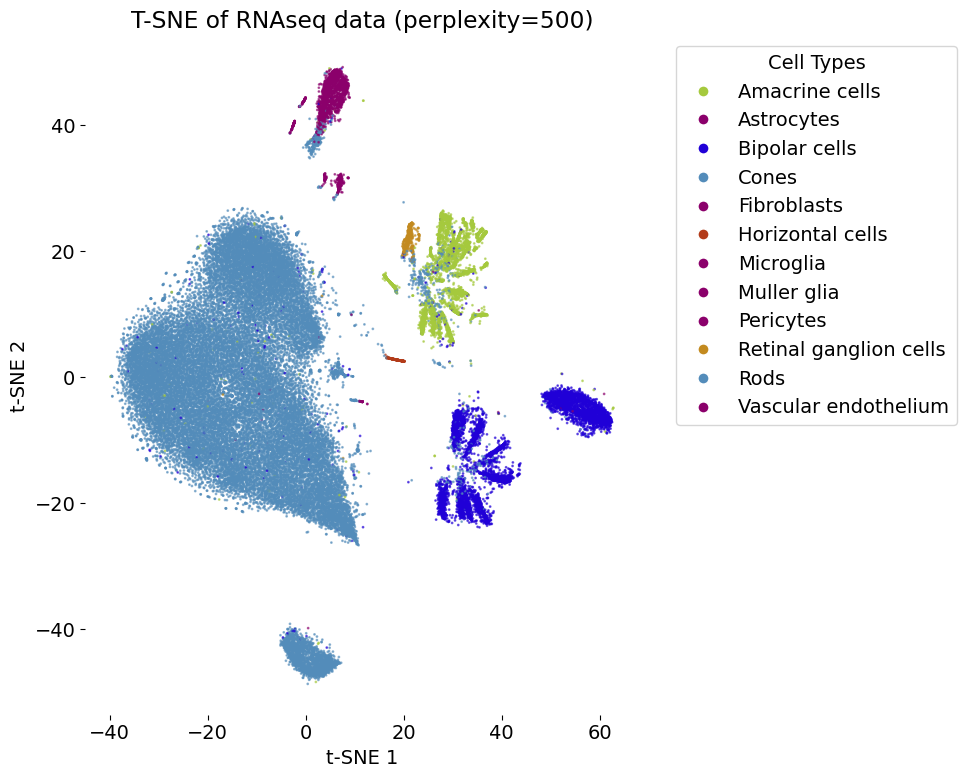

In [11]:
# Your code goes here:

# SOL:
tsne_perplexity = TSNE(n_components=2, perplexity=500, n_iter=1000, random_state=42, metric='euclidean',
            verbose=1, init='pca', n_jobs=-1)

# fit the model:
model_tsne_perplexity = tsne_perplexity.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(model_tsne_perplexity[:, 0], model_tsne_perplexity[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('T-SNE of RNAseq data (perplexity=500)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'tsne_RNAseq_data_scikit_perplexity500.png'), dpi=300)
plt.show()

## 📝 Compare the results
Compare the results of the different t-SNE models in terms of the global structure they preserve.




# Your answer goes here
